## ЧАСТЬ B

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
data.head(10)

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Соответствие значений столбца TYPE и названий типов

In [3]:
types = data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Предварительно масштабируем данные

In [4]:
data_x = data.iloc[:, 1:-1].values
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data_x)
print('Исходные данные')
print(data_x)
print('\nПосле масштабирования')
print(data_scaled)

Исходные данные
[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]

После масштабирования
[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


## Разбиваем данные на обучающую и тестовую выборку

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled,
                                                    types,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=types,
                                                    random_state=151)

## Производим балансировку классов в обучающих данных, чтобы выровнять число экземпляров для всех классов

In [6]:
sm = SMOTE ()

In [7]:
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

## Посмотрим как изменились данные после балансировки (на примере самых малочисленных классов)

In [8]:
print ("До балансировки, количество объектов класса '5': {0}".format (sum (y_train==5)))
print ("До балансировки, количество объектов класса '6': {0}\n".format (sum (y_train==6)))
print ("После балансировки, размерность обучающего набора X_train_res: {0}".format (X_train_res.shape))
print ("После балансировки, размерность обучающего набора y_train_res: {0}\n".format (y_train_res.shape))
print ("После балансировки, количество объектов класса '5': {0}".format (sum (y_train_res==6)))
print ("После балансировки, количество объектов класса '6': {0}".format (sum (y_train_res==6)))

До балансировки, количество объектов класса '5': 9
До балансировки, количество объектов класса '6': 6

После балансировки, размерность обучающего набора X_train_res: (318, 9)
После балансировки, размерность обучающего набора y_train_res: (318,)

После балансировки, количество объектов класса '5': 53
После балансировки, количество объектов класса '6': 53


## Обучение knn классификатора

In [26]:
knn = KNeighborsClassifier(n_neighbors=3,
                           weights='distance',
                           metric='manhattan').fit(X_train_res, y_train_res)

#### До балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки \
Accuracy: 1.0\
Precision: 1.0\
Recall: 1.0\
F1 measure: 1.0

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.7230769230769231\
Precision: 0.6976763925729443\
Recall: 0.7230769230769231\
F1 measure: 0.6892310718987879

#### Удалось достичь с применением балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 1.0\
Precision: 1.0\
Recall: 1.0\
F1 measure: 1.0

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.7384615384615385\
Precision: 0.7354400959664118\
Recall: 0.7384615384615385\
F1 measure: 0.7333797313797314

## Предсказание на тестовой выборке

In [27]:
y_test_pred = knn.predict(X_test)

## Точность предсказания, Precision, Recall, F1 measure для обучающей выборки

In [28]:
from sklearn import metrics
y_train_pred = knn.predict(X_train_res)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train_res, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_train_res, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_train_res, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:", metrics.f1_score(y_train_res, y_train_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 measure: 1.0


## Точность предсказания, Precision, Recall, F1 measure для тестовой выборки

In [29]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.7384615384615385
Precision: 0.7354400959664118
Recall: 0.7384615384615385
F1 measure: 0.7333797313797314


## Grid search

In [30]:
grid_params = {
    'n_neighbors' : list(range(3,20)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

gs = GridSearchCV(KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1)

gs_results = gs.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 136 candidates, totalling 408 fits


In [31]:
gs_results.best_score_
#0.8710691823899371

0.8710691823899371

In [32]:
gs_results.best_estimator_
#KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [33]:
gs_results.best_params_
#{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

## Снижение размерности обучающих данных для рисования при помощи TSNE

In [34]:
train_tsne = TSNE(init='random', perplexity=12.0, random_state = 151).fit_transform(X_train_res)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of training data')]

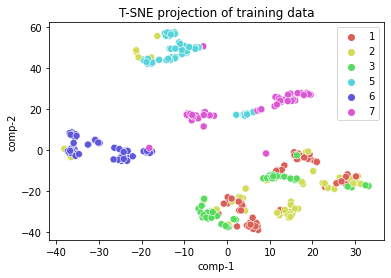

In [35]:
train_tsne_df = pd.DataFrame()
train_tsne_df["y"] = y_train_res
train_tsne_df["comp-1"] = train_tsne[:,0]
train_tsne_df["comp-2"] = train_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=train_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(train_tsne_df.y.tolist()))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of training data") 

## Отображение результата классификации обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on training data')]

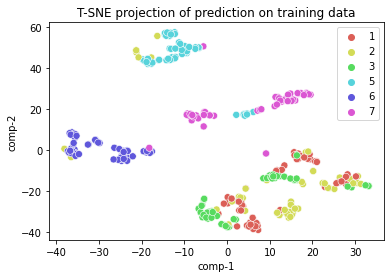

In [36]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_train_pred,
                palette=sns.color_palette("hls", len(Counter(y_train_pred))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of prediction on training data") 

## Снижение размерности тестовых данных для отображения при помощи TSNE

In [37]:
test_tsne = TSNE(init='random', perplexity=20.0, random_state = 151).fit_transform(X_test)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of test data')]

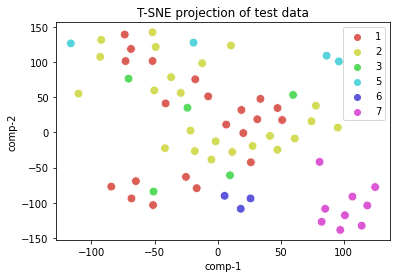

In [38]:
test_tsne_df = pd.DataFrame()
test_tsne_df["y"] = y_test
test_tsne_df["comp-1"] = test_tsne[:,0]
test_tsne_df["comp-2"] = test_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=test_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(test_tsne_df.y.tolist()))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of test data") 

## Отображение результата классификации тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on test data')]

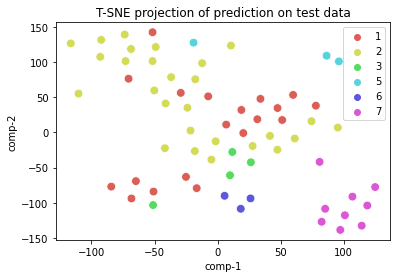

In [39]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_test_pred,
                palette=sns.color_palette("hls", len(Counter(y_test_pred))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of prediction on test data") 

## Примечания

В датасете представлено 6 категорий стекол:

1: "building_windows_float_processed" - 70 экземпляров\
2 : "building_windows_non_float_processed" - 76 экземпляров\
3 : "vehicle_windows_float_processed" - 17 экземпляров\
5 : "containers" - 13 экземпляров\
6 : "tableware" - 9 экземпляров\
7 :"headlamps" - 29 экземпляров

После балансировки классификация объектов практически не изменилась.\
Однако все равно можно увидеть, что Метод ближайших соседей классифицирует объекты лучше, чем метод опорных векторов для данного набора данных.\
В проведенных тестах видно, что классы объектов не исчезают полностью (Категория 5 в SVM была полностью включена в класс 2)\
Точность определения тестовых данных выше на ~7% 